**CIFAR-10 DATASET -2D-CNN**

**Loading the libraries**

In \[83\]:

    from keras.datasets import cifar10
    import matplotlib.pyplot as plt
    import numpy as np, time
    from datetime import timedelta
    from keras.utils.np_utils import to_categorical 
    from keras.models import Sequential
    from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
    from keras.utils import np_utils
    from keras.optimizers import SGD
    from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping

**Loading the dataset**

In \[84\]:

    (X_train, y_train), (X_test, y_test) = cifar10.load_data()

In \[85\]:

    cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
    print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))
    f, axarr = plt.subplots(1, 5)
    f.set_size_inches(16, 6)
    for i in range(5):
        img = X_train[i]
        axarr[i].imshow(img)
    plt.show()

    Example training images and their labels: [6, 9, 9, 4, 1]
    Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']

![](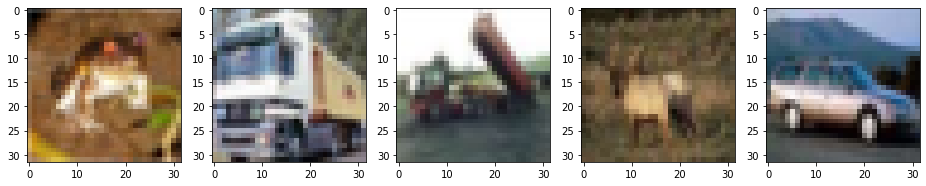%0A)

In \[86\]:

    for i in range(9):
        # define subplot
        plt.subplot(330 + 1 + i)
        # plot raw pixel data
        plt.imshow(X_train[i])
    # show the figure
    plt.show()

![](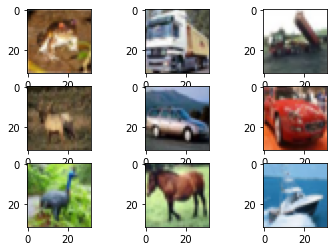%0A)

In \[87\]:

    Y_train = to_categorical(y_train, num_classes=10)
    Y_test = to_categorical(y_test, num_classes=10)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    print("Shape of training data:")
    print(X_train.shape)
    print(Y_train.shape)
    print("Shape of test data:")
    print(X_test.shape)
    print(Y_test.shape)

    Shape of training data:
    (50000, 32, 32, 3)
    (50000, 10)
    Shape of test data:
    (10000, 32, 32, 3)
    (10000, 10)

**Creating the model**

In \[88\]:

    # building a linear stack of layers with the sequential model
    model = Sequential()
    # convolutional layer
    model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
    # convolutional layer
    model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(70, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    # flatten output of conv
    model.add(Flatten())
    # hidden layer
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(250, activation='relu'))
    model.add(Dropout(0.3))
    # output layer
    model.add(Dense(10, activation='softmax'))
    model.summary()

    Model: "sequential_1"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    conv2d_3 (Conv2D)            (None, 32, 32, 25)        700       
    _________________________________________________________________
    conv2d_4 (Conv2D)            (None, 32, 32, 50)        11300     
    _________________________________________________________________
    max_pooling2d_2 (MaxPooling2 (None, 16, 16, 50)        0         
    _________________________________________________________________
    dropout_4 (Dropout)          (None, 16, 16, 50)        0         
    _________________________________________________________________
    conv2d_5 (Conv2D)            (None, 16, 16, 70)        31570     
    _________________________________________________________________
    max_pooling2d_3 (MaxPooling2 (None, 8, 8, 70)          0         
    _________________________________________________________________
    dropout_5 (Dropout)          (None, 8, 8, 70)          0         
    _________________________________________________________________
    flatten_1 (Flatten)          (None, 4480)              0         
    _________________________________________________________________
    dense_3 (Dense)              (None, 500)               2240500   
    _________________________________________________________________
    dropout_6 (Dropout)          (None, 500)               0         
    _________________________________________________________________
    dense_4 (Dense)              (None, 250)               125250    
    _________________________________________________________________
    dropout_7 (Dropout)          (None, 250)               0         
    _________________________________________________________________
    dense_5 (Dense)              (None, 10)                2510      
    =================================================================
    Total params: 2,411,830
    Trainable params: 2,411,830
    Non-trainable params: 0
    _________________________________________________________________

**Compiling the model**

In \[89\]:

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

**Training the Model**

In \[90\]:

    checkpoint= ModelCheckpoint("./model/cifar10_epo_cnn.h5",monitor='val_accuracy', mode='max', save_best_only=True)
    call_backs=[checkpoint]

    t1=time.time()
    history = model.fit(X_train, Y_train, batch_size=32, callbacks=call_backs,epochs=50,verbose=2, validation_split=0.2)
    t2=time.time()
    t=t2-t1

    training_time=timedelta(seconds=t)
    print('Training time : %s' % str(training_time))

    Epoch 1/50
    1250/1250 - 15s - loss: 1.5942 - accuracy: 0.4115 - val_loss: 1.1887 - val_accuracy: 0.5880
    Epoch 2/50
    1250/1250 - 14s - loss: 1.1490 - accuracy: 0.5926 - val_loss: 0.9902 - val_accuracy: 0.6463
    Epoch 3/50
    1250/1250 - 14s - loss: 0.9899 - accuracy: 0.6523 - val_loss: 0.8678 - val_accuracy: 0.6994
    Epoch 4/50
    1250/1250 - 14s - loss: 0.8840 - accuracy: 0.6897 - val_loss: 0.8020 - val_accuracy: 0.7275
    Epoch 5/50
    1250/1250 - 14s - loss: 0.8116 - accuracy: 0.7157 - val_loss: 0.7701 - val_accuracy: 0.7348
    Epoch 6/50
    1250/1250 - 14s - loss: 0.7471 - accuracy: 0.7400 - val_loss: 0.7674 - val_accuracy: 0.7340
    Epoch 7/50
    1250/1250 - 14s - loss: 0.6977 - accuracy: 0.7556 - val_loss: 0.7440 - val_accuracy: 0.7462
    Epoch 8/50
    1250/1250 - 14s - loss: 0.6614 - accuracy: 0.7686 - val_loss: 0.7377 - val_accuracy: 0.7448
    Epoch 9/50
    1250/1250 - 14s - loss: 0.6294 - accuracy: 0.7791 - val_loss: 0.7240 - val_accuracy: 0.7570
    Epoch 10/50
    1250/1250 - 14s - loss: 0.5915 - accuracy: 0.7939 - val_loss: 0.7076 - val_accuracy: 0.7560
    Epoch 11/50
    1250/1250 - 14s - loss: 0.5626 - accuracy: 0.8022 - val_loss: 0.7019 - val_accuracy: 0.7570
    Epoch 12/50
    1250/1250 - 14s - loss: 0.5382 - accuracy: 0.8086 - val_loss: 0.7458 - val_accuracy: 0.7497
    Epoch 13/50
    1250/1250 - 14s - loss: 0.5203 - accuracy: 0.8162 - val_loss: 0.7251 - val_accuracy: 0.7605
    Epoch 14/50
    1250/1250 - 14s - loss: 0.4964 - accuracy: 0.8247 - val_loss: 0.6945 - val_accuracy: 0.7697
    Epoch 15/50
    1250/1250 - 14s - loss: 0.4777 - accuracy: 0.8313 - val_loss: 0.7115 - val_accuracy: 0.7614
    Epoch 16/50
    1250/1250 - 14s - loss: 0.4647 - accuracy: 0.8373 - val_loss: 0.7195 - val_accuracy: 0.7639
    Epoch 17/50
    1250/1250 - 14s - loss: 0.4462 - accuracy: 0.8425 - val_loss: 0.7087 - val_accuracy: 0.7671
    Epoch 18/50
    1250/1250 - 14s - loss: 0.4418 - accuracy: 0.8471 - val_loss: 0.7011 - val_accuracy: 0.7715
    Epoch 19/50
    1250/1250 - 14s - loss: 0.4231 - accuracy: 0.8533 - val_loss: 0.7304 - val_accuracy: 0.7652
    Epoch 20/50
    1250/1250 - 14s - loss: 0.4128 - accuracy: 0.8557 - val_loss: 0.7311 - val_accuracy: 0.7642
    Epoch 21/50
    1250/1250 - 14s - loss: 0.4039 - accuracy: 0.8605 - val_loss: 0.7264 - val_accuracy: 0.7721
    Epoch 22/50
    1250/1250 - 14s - loss: 0.3927 - accuracy: 0.8652 - val_loss: 0.7253 - val_accuracy: 0.7686
    Epoch 23/50
    1250/1250 - 14s - loss: 0.3756 - accuracy: 0.8702 - val_loss: 0.7192 - val_accuracy: 0.7700
    Epoch 24/50
    1250/1250 - 14s - loss: 0.3753 - accuracy: 0.8705 - val_loss: 0.7352 - val_accuracy: 0.7647
    Epoch 25/50
    1250/1250 - 14s - loss: 0.3663 - accuracy: 0.8742 - val_loss: 0.7355 - val_accuracy: 0.7695
    Epoch 26/50
    1250/1250 - 14s - loss: 0.3502 - accuracy: 0.8810 - val_loss: 0.7414 - val_accuracy: 0.7714
    Epoch 27/50
    1250/1250 - 14s - loss: 0.3473 - accuracy: 0.8809 - val_loss: 0.7595 - val_accuracy: 0.7706
    Epoch 28/50
    1250/1250 - 14s - loss: 0.3482 - accuracy: 0.8834 - val_loss: 0.7461 - val_accuracy: 0.7673
    Epoch 29/50
    1250/1250 - 14s - loss: 0.3369 - accuracy: 0.8879 - val_loss: 0.7267 - val_accuracy: 0.7753
    Epoch 30/50
    1250/1250 - 14s - loss: 0.3274 - accuracy: 0.8902 - val_loss: 0.7166 - val_accuracy: 0.7778
    Epoch 31/50
    1250/1250 - 14s - loss: 0.3234 - accuracy: 0.8904 - val_loss: 0.7655 - val_accuracy: 0.7695
    Epoch 32/50
    1250/1250 - 14s - loss: 0.3200 - accuracy: 0.8931 - val_loss: 0.7295 - val_accuracy: 0.7758
    Epoch 33/50
    1250/1250 - 14s - loss: 0.3146 - accuracy: 0.8939 - val_loss: 0.7571 - val_accuracy: 0.7749
    Epoch 34/50
    1250/1250 - 14s - loss: 0.3131 - accuracy: 0.8933 - val_loss: 0.7439 - val_accuracy: 0.7747
    Epoch 35/50
    1250/1250 - 14s - loss: 0.3026 - accuracy: 0.8974 - val_loss: 0.7585 - val_accuracy: 0.7723
    Epoch 36/50
    1250/1250 - 14s - loss: 0.3034 - accuracy: 0.8985 - val_loss: 0.7572 - val_accuracy: 0.7773
    Epoch 37/50
    1250/1250 - 14s - loss: 0.2973 - accuracy: 0.8997 - val_loss: 0.7355 - val_accuracy: 0.7795
    Epoch 38/50
    1250/1250 - 14s - loss: 0.2936 - accuracy: 0.9029 - val_loss: 0.7846 - val_accuracy: 0.7658
    Epoch 39/50
    1250/1250 - 14s - loss: 0.2913 - accuracy: 0.9040 - val_loss: 0.7684 - val_accuracy: 0.7755
    Epoch 40/50
    1250/1250 - 14s - loss: 0.2849 - accuracy: 0.9062 - val_loss: 0.7760 - val_accuracy: 0.7729
    Epoch 41/50
    1250/1250 - 14s - loss: 0.2842 - accuracy: 0.9050 - val_loss: 0.7650 - val_accuracy: 0.7702
    Epoch 42/50
    1250/1250 - 14s - loss: 0.2843 - accuracy: 0.9071 - val_loss: 0.7914 - val_accuracy: 0.7701
    Epoch 43/50
    1250/1250 - 14s - loss: 0.2752 - accuracy: 0.9080 - val_loss: 0.7565 - val_accuracy: 0.7785
    Epoch 44/50
    1250/1250 - 14s - loss: 0.2760 - accuracy: 0.9104 - val_loss: 0.7870 - val_accuracy: 0.7735
    Epoch 45/50
    1250/1250 - 14s - loss: 0.2627 - accuracy: 0.9141 - val_loss: 0.7974 - val_accuracy: 0.7796
    Epoch 46/50
    1250/1250 - 14s - loss: 0.2739 - accuracy: 0.9112 - val_loss: 0.7741 - val_accuracy: 0.7834
    Epoch 47/50
    1250/1250 - 14s - loss: 0.2647 - accuracy: 0.9119 - val_loss: 0.7700 - val_accuracy: 0.7745
    Epoch 48/50
    1250/1250 - 14s - loss: 0.2588 - accuracy: 0.9148 - val_loss: 0.7891 - val_accuracy: 0.7738
    Epoch 49/50
    1250/1250 - 14s - loss: 0.2653 - accuracy: 0.9130 - val_loss: 0.7811 - val_accuracy: 0.7683
    Epoch 50/50
    1250/1250 - 14s - loss: 0.2593 - accuracy: 0.9149 - val_loss: 0.8193 - val_accuracy: 0.7698
    Training time : 0:11:35.490247

In \[91\]:

    plt.style.use('bmh')
    # Accuracy Curves
    plt.plot(history.history['accuracy'],'b',linewidth=2.0)
    plt.plot(history.history['val_accuracy'],'g',linewidth=2.0)
    plt.legend(['Training','Validation'],fontsize=12,frameon=True,loc='best')
    plt.xlabel('Epochs',fontsize=14)
    plt.ylabel('Accuracy',fontsize=14)
    plt.grid(True)
    plt.show()
    plt.style.use('bmh')
    # Loss Curves
    plt.plot(history.history['loss'],'b',linewidth=2.0)
    plt.plot(history.history['val_loss'],'g',linewidth=2.0)
    plt.legend(['Training','Validation'],fontsize=12,frameon=True,loc='best')
    plt.xlabel('Epochs',fontsize=14)
    plt.ylabel('Loss',fontsize=14)
    plt.grid(True)
    plt.show()

![](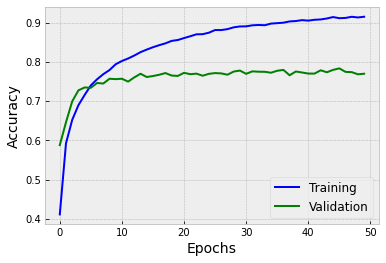%0A)

![](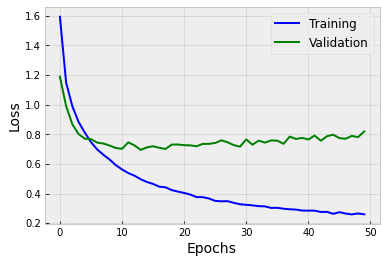%0A)

In \[92\]:

    model.save("./model/cifar10_epo_cnn.h5")
    model.save_weights("./model/cifar10_epo_cnn_weights.h5")
    print("Model Weights Saved...!")

    Model Weights Saved...!

**Testing**

**Import the libraries**

In \[93\]:

    from keras.models import Sequential, load_model
    from keras.preprocessing import image
    import numpy as np
    import os
    from os import listdir
    from os.path import isfile, join
    from keras.preprocessing.image import ImageDataGenerator , load_img, img_to_array

**loading the model**

In \[94\]:

    model = load_model('./model/cifar10_epo_cnn.h5')
    print("Model Loaded...!")

    Model Loaded...!

**Declaring the variables**

In \[95\]:

    # dimensions of our images
    img_width, img_height = 32,32
    c1,c2,c3,c4,c5,c6,c7,c8,c9,c10 = 0,0,0,0,0,0,0,0,0,0
    x = 100
    i = 0
    classes = {0: "Airplane", 1: "Automobile  ", 2: "Bird",
               3: "Cat", 4: "Deer", 5: "Dog", 6: "Frog",
               7: "Horse", 8: "Ship", 9: "Truck"}

In \[96\]:

    for i in range(x):
        print("\n\n Feature shape[",i,"] :", X_test[i].shape)
        f = np.expand_dims(X_test[i],axis=0)
        ypred = model.predict(f)
        print("Result               :",ypred)
        out = int(np.argmax(ypred))  
        print("Detected index       :",out)
        ans = classes[out]
        print("Detected Class       :",ans)
        i += 1
        #print("Count                :",i,"\n")
        if out == 0: c1 +=1
        if out == 1: c2 +=1
        if out == 2: c3 +=1
        if out == 3: c4 +=1
        if out == 4: c5 +=1
        if out == 5: c6 +=1
        if out == 6: c7 +=1
        if out == 7: c8 +=1
        if out == 8: c9 +=1
        if out == 9: c10 +=1
    if i>=x:
      print("\n CIFAR-10 testing using 2D CNN")
      print("\n Airplane \tAutomobile \tBird \tCat \tDeer \tDog \tFrog \tHorse \tShip \tTruck")
      print("  ",c1, "\t\t" , c2 ,"\t\t", c3 ,"\t" ,c4 ,"\t", c5,"\t",  c6,"\t",  c7,"\t",  c8,"\t",  c9,"\t",  c10,"\n")   
      print('No. of images tested - '+'{}'.format(i)+'.\n')


     Feature shape[ 0 ] : (32, 32, 3)
    Result               : [[1.6891428e-03 4.6409696e-05 9.2197955e-04 7.3761427e-01 1.3418194e-04
      2.5218612e-01 5.9830202e-03 1.1923965e-03 1.1134551e-04 1.2118030e-04]]
    Detected index       : 3
    Detected Class       : Cat


     Feature shape[ 1 ] : (32, 32, 3)
    Result               : [[1.4089144e-05 5.3304121e-02 8.8707965e-14 7.7748884e-12 3.7818839e-13
      4.9250794e-13 4.0488212e-12 2.8575141e-14 9.4668168e-01 8.6315822e-08]]
    Detected index       : 8
    Detected Class       : Ship


     Feature shape[ 2 ] : (32, 32, 3)
    Result               : [[2.6578056e-02 3.1845488e-02 9.3994116e-05 3.6193841e-04 8.7748449e-05
      1.2487410e-04 7.3294097e-04 1.1053045e-04 9.2336160e-01 1.6702881e-02]]
    Detected index       : 8
    Detected Class       : Ship


     Feature shape[ 3 ] : (32, 32, 3)
    Result               : [[0.7332462  0.00493357 0.10259836 0.00530473 0.03278174 0.01133175
      0.00965526 0.00697297 0.09175178 0.00142364]]
    Detected index       : 0
    Detected Class       : Airplane


     Feature shape[ 4 ] : (32, 32, 3)
    Result               : [[1.0571476e-10 1.4765093e-10 2.4519509e-06 1.0690636e-04 2.0105056e-06
      9.2461159e-09 9.9988866e-01 3.0992305e-12 2.0962218e-11 6.4652346e-11]]
    Detected index       : 6
    Detected Class       : Frog


     Feature shape[ 5 ] : (32, 32, 3)
    Result               : [[1.8723357e-07 9.3180956e-09 5.5865080e-06 1.0372549e-03 1.3845141e-06
      9.0431352e-04 9.9805129e-01 5.8596040e-08 3.0045808e-08 1.8585579e-08]]
    Detected index       : 6
    Detected Class       : Frog


     Feature shape[ 6 ] : (32, 32, 3)
    Result               : [[2.3953689e-05 9.9749762e-01 1.1972257e-07 1.5172700e-04 1.0700209e-06
      8.2605082e-04 8.9286434e-05 1.3520191e-06 3.6863596e-04 1.0402200e-03]]
    Detected index       : 1
    Detected Class       : Automobile   


     Feature shape[ 7 ] : (32, 32, 3)
    Result               : [[3.3183314e-04 1.2589045e-04 6.2787812e-03 9.9801561e-03 1.5672648e-03
      7.5497618e-04 9.8060799e-01 5.3580898e-05 1.6491067e-04 1.3453457e-04]]
    Detected index       : 6
    Detected Class       : Frog


     Feature shape[ 8 ] : (32, 32, 3)
    Result               : [[2.7000633e-08 1.4342149e-11 8.5735741e-07 9.9864179e-01 2.1194184e-07
      1.3553280e-03 1.2223774e-06 6.1252638e-07 2.2858139e-11 6.7655552e-09]]
    Detected index       : 3
    Detected Class       : Cat


     Feature shape[ 9 ] : (32, 32, 3)
    Result               : [[0.00085229 0.6664583  0.00082521 0.00369305 0.00142324 0.00093419
      0.00215691 0.00317255 0.00974298 0.3107412 ]]
    Detected index       : 1
    Detected Class       : Automobile   


     Feature shape[ 10 ] : (32, 32, 3)
    Result               : [[9.2981577e-01 8.6145250e-05 3.9431535e-02 7.5924965e-03 1.0513915e-02
      2.8249349e-03 7.4091721e-03 2.1527063e-03 9.4220457e-05 7.9161990e-05]]
    Detected index       : 0
    Detected Class       : Airplane


     Feature shape[ 11 ] : (32, 32, 3)
    Result               : [[2.0807420e-20 1.0716286e-15 5.6606696e-25 1.4887780e-25 1.1505250e-27
      1.7914145e-27 3.6138731e-27 3.4404789e-23 3.4526757e-18 1.0000000e+00]]
    Detected index       : 9
    Detected Class       : Truck


     Feature shape[ 12 ] : (32, 32, 3)
    Result               : [[5.58726933e-05 1.72423552e-05 4.64344892e-04 9.77959018e-03
      1.49157061e-03 9.76052701e-01 2.16923864e-03 9.78208054e-03
      7.46926016e-05 1.12691705e-04]]
    Detected index       : 5
    Detected Class       : Dog


     Feature shape[ 13 ] : (32, 32, 3)
    Result               : [[6.51641545e-12 5.81808424e-15 2.61570876e-10 1.01788214e-13
      1.71094570e-08 4.00280920e-09 1.95785271e-15 1.00000000e+00
      1.72868972e-14 8.35314240e-13]]
    Detected index       : 7
    Detected Class       : Horse


     Feature shape[ 14 ] : (32, 32, 3)
    Result               : [[1.0126763e-14 1.7938038e-09 1.0524524e-18 9.6648899e-18 1.3637929e-20
      1.2842881e-18 1.2538664e-20 8.6679522e-17 3.3218269e-13 1.0000000e+00]]
    Detected index       : 9
    Detected Class       : Truck


     Feature shape[ 15 ] : (32, 32, 3)
    Result               : [[7.6582027e-04 3.2286731e-05 6.3677189e-06 1.9717209e-04 3.8456114e-06
      4.1476414e-06 4.0047612e-02 5.9369235e-08 9.5893437e-01 8.2993947e-06]]
    Detected index       : 8
    Detected Class       : Ship


     Feature shape[ 16 ] : (32, 32, 3)
    Result               : [[1.1405004e-06 3.0323765e-08 4.8302565e-05 7.8900292e-04 3.6907377e-08
      9.9915588e-01 1.8512036e-07 5.3622393e-06 4.6230809e-08 8.1711882e-09]]
    Detected index       : 5
    Detected Class       : Dog


     Feature shape[ 17 ] : (32, 32, 3)
    Result               : [[1.9572468e-03 7.2703133e-06 3.5382874e-04 7.0982002e-02 1.6348124e-04
      9.0193182e-02 1.5276874e-04 8.3572543e-01 2.3456463e-05 4.4126846e-04]]
    Detected index       : 7
    Detected Class       : Horse


     Feature shape[ 18 ] : (32, 32, 3)
    Result               : [[1.2763766e-07 1.2262740e-13 2.0571883e-15 2.3263968e-14 2.3788531e-16
      3.7949450e-18 3.6201782e-12 1.9532384e-19 9.9999988e-01 5.7951288e-10]]
    Detected index       : 8
    Detected Class       : Ship


     Feature shape[ 19 ] : (32, 32, 3)
    Result               : [[7.5647040e-18 8.2574893e-18 2.4256500e-10 3.2393265e-15 6.5312500e-15
      4.3413813e-16 1.0000000e+00 2.7027560e-19 3.2585875e-22 2.7414228e-21]]
    Detected index       : 6
    Detected Class       : Frog


     Feature shape[ 20 ] : (32, 32, 3)
    Result               : [[6.0749990e-03 2.2751803e-07 6.9299867e-06 3.5581783e-05 6.9845100e-03
      2.1268565e-05 9.0403461e-08 9.8686850e-01 9.1323943e-07 6.9403045e-06]]
    Detected index       : 7
    Detected Class       : Horse


     Feature shape[ 21 ] : (32, 32, 3)
    Result               : [[8.6451209e-01 2.8719757e-11 1.3548739e-01 5.4635319e-07 3.5050163e-09
      1.7031057e-11 2.1414305e-12 2.9969577e-10 4.8593185e-11 3.3226450e-16]]
    Detected index       : 0
    Detected Class       : Airplane


     Feature shape[ 22 ] : (32, 32, 3)
    Result               : [[3.3888885e-01 7.3555428e-05 9.3288742e-02 3.0258207e-03 5.5162603e-01
      1.1188113e-03 6.2884279e-03 3.6624863e-04 5.2130534e-03 1.1037786e-04]]
    Detected index       : 4
    Detected Class       : Deer


     Feature shape[ 23 ] : (32, 32, 3)
    Result               : [[1.6037681e-13 5.1519212e-08 2.2637907e-20 1.7276627e-20 8.8052033e-22
      9.2008389e-24 1.4937772e-19 4.6853076e-19 1.9962176e-14 1.0000000e+00]]
    Detected index       : 9
    Detected Class       : Truck


     Feature shape[ 24 ] : (32, 32, 3)
    Result               : [[6.7297733e-06 2.0688681e-10 1.6870692e-04 1.8449465e-03 9.5154572e-01
      4.2695951e-02 7.3288597e-06 3.7306617e-03 7.1904966e-09 2.9290829e-08]]
    Detected index       : 4
    Detected Class       : Deer


     Feature shape[ 25 ] : (32, 32, 3)
    Result               : [[1.11540942e-03 7.18803494e-05 7.28956342e-01 5.45885488e-02
      1.67270333e-01 2.12365407e-02 1.42335286e-02 1.19729545e-02
      3.96791234e-04 1.57725211e-04]]
    Detected index       : 2
    Detected Class       : Bird


     Feature shape[ 26 ] : (32, 32, 3)
    Result               : [[2.7519336e-06 5.0171977e-08 7.2245073e-04 1.3409574e-02 9.7799712e-01
      5.1846034e-03 1.9812459e-04 2.4794962e-03 9.6088706e-07 4.8805782e-06]]
    Detected index       : 4
    Detected Class       : Deer


     Feature shape[ 27 ] : (32, 32, 3)
    Result               : [[9.9615377e-01 3.0427900e-06 2.8748906e-03 1.4942033e-06 9.3499693e-04
      5.2033067e-07 6.1118169e-07 4.2208649e-07 2.9030089e-05 1.0781213e-06]]
    Detected index       : 0
    Detected Class       : Airplane


     Feature shape[ 28 ] : (32, 32, 3)
    Result               : [[1.20367281e-06 5.39037319e-06 1.06017342e-05 9.97129246e-05
      1.43265925e-05 7.54384791e-06 6.61912395e-07 4.15903196e-05
      4.25841222e-07 9.99818504e-01]]
    Detected index       : 9
    Detected Class       : Truck


     Feature shape[ 29 ] : (32, 32, 3)
    Result               : [[8.0378482e-12 9.0728385e-13 1.0643596e-09 5.5397513e-09 2.4773539e-10
      1.0893455e-11 1.0000000e+00 2.9683253e-14 1.7011620e-14 9.2151872e-13]]
    Detected index       : 6
    Detected Class       : Frog


     Feature shape[ 30 ] : (32, 32, 3)
    Result               : [[1.0034939e-06 5.7434880e-07 4.0499915e-04 1.8615869e-05 1.0060654e-05
      2.5857148e-06 9.9955803e-01 2.9383639e-07 8.9530428e-09 3.9826441e-06]]
    Detected index       : 6
    Detected Class       : Frog


     Feature shape[ 31 ] : (32, 32, 3)
    Result               : [[5.2122294e-05 3.1330389e-06 3.4921209e-04 6.2399812e-02 2.4574054e-05
      9.3682361e-01 5.5985114e-05 2.6933686e-04 1.5693262e-05 6.5224267e-06]]
    Detected index       : 5
    Detected Class       : Dog


     Feature shape[ 32 ] : (32, 32, 3)
    Result               : [[2.98614323e-04 8.93241918e-07 8.65716875e-01 7.58330384e-03
      8.55412334e-02 4.46642007e-05 4.06699106e-02 3.45375302e-05
      1.09252076e-04 6.61151830e-07]]
    Detected index       : 2
    Detected Class       : Bird


     Feature shape[ 33 ] : (32, 32, 3)
    Result               : [[3.3286060e-04 5.7353947e-05 3.0820221e-01 2.9938138e-01 3.9932546e-03
      1.0103250e-01 2.8374538e-01 2.0411105e-03 1.0666532e-03 1.4730002e-04]]
    Detected index       : 2
    Detected Class       : Bird


     Feature shape[ 34 ] : (32, 32, 3)
    Result               : [[2.9892369e-08 9.0819636e-09 3.2190800e-12 1.2753381e-12 5.5198793e-13
      1.4088940e-13 6.0403878e-14 1.0026501e-09 8.8061176e-09 1.0000000e+00]]
    Detected index       : 9
    Detected Class       : Truck


     Feature shape[ 35 ] : (32, 32, 3)
    Result               : [[8.8582945e-04 8.8216225e-03 1.0950924e-03 2.3925878e-02 1.1608953e-03
      8.3910571e-03 2.1198804e-03 6.6062360e-04 1.8264322e-02 9.3467486e-01]]
    Detected index       : 9
    Detected Class       : Truck


     Feature shape[ 36 ] : (32, 32, 3)
    Result               : [[1.3142894e-08 3.6518674e-11 1.2703415e-05 3.0224766e-05 8.6649817e-01
      6.0961343e-02 2.8054666e-05 7.2469383e-02 2.0830983e-11 2.8062048e-09]]
    Detected index       : 4
    Detected Class       : Deer


     Feature shape[ 37 ] : (32, 32, 3)
    Result               : [[2.2144912e-01 2.9751632e-01 1.1536556e-03 1.6515412e-03 6.5083680e-04
      1.5781164e-03 4.1300856e-04 1.2730820e-03 5.8527659e-03 4.6846154e-01]]
    Detected index       : 9
    Detected Class       : Truck


     Feature shape[ 38 ] : (32, 32, 3)
    Result               : [[2.0235508e-10 2.8100411e-08 5.0479145e-14 4.2354663e-14 1.9506436e-15
      1.0654736e-15 7.8901314e-15 7.2038777e-14 8.8351348e-10 1.0000000e+00]]
    Detected index       : 9
    Detected Class       : Truck


     Feature shape[ 39 ] : (32, 32, 3)
    Result               : [[7.1196444e-09 3.8593295e-10 7.8070832e-07 6.8264824e-05 6.3188217e-08
      9.9992406e-01 4.7551312e-06 1.9964359e-06 6.7178685e-10 2.4758160e-09]]
    Detected index       : 5
    Detected Class       : Dog


     Feature shape[ 40 ] : (32, 32, 3)
    Result               : [[9.6729672e-01 8.1254043e-09 3.0747542e-04 6.8737421e-07 3.2193433e-02
      5.6222631e-09 8.8279414e-08 1.1311464e-06 1.9157534e-04 8.9021460e-06]]
    Detected index       : 0
    Detected Class       : Airplane


     Feature shape[ 41 ] : (32, 32, 3)
    Result               : [[2.8663909e-17 3.8374428e-16 4.0522204e-12 2.5187020e-16 2.3195747e-17
      9.9957289e-16 1.0000000e+00 6.7453310e-17 1.1460343e-21 5.7009505e-19]]
    Detected index       : 6
    Detected Class       : Frog


     Feature shape[ 42 ] : (32, 32, 3)
    Result               : [[7.2932325e-04 6.8801513e-05 1.2618945e-02 1.8485932e-01 4.1618887e-02
      4.5861816e-01 7.4253534e-04 2.9546759e-01 5.1165087e-04 4.7647464e-03]]
    Detected index       : 5
    Detected Class       : Dog


     Feature shape[ 43 ] : (32, 32, 3)
    Result               : [[1.4341005e-09 1.4953778e-10 1.5194208e-06 3.0809389e-08 2.4614238e-11
      2.9570177e-07 9.9999821e-01 2.6236010e-12 2.9015784e-10 2.4647157e-12]]
    Detected index       : 6
    Detected Class       : Frog


     Feature shape[ 44 ] : (32, 32, 3)
    Result               : [[9.8512983e-01 1.2955654e-02 2.7548977e-06 3.0820978e-08 2.1032649e-07
      3.8450976e-10 6.3134693e-09 8.1259010e-08 1.6176499e-03 2.9375279e-04]]
    Detected index       : 0
    Detected Class       : Airplane


     Feature shape[ 45 ] : (32, 32, 3)
    Result               : [[1.5070492e-09 1.7094550e-08 4.9057891e-15 8.5155007e-14 9.2188652e-16
      1.5553838e-16 1.0826363e-15 3.2061569e-12 1.2234487e-11 1.0000000e+00]]
    Detected index       : 9
    Detected Class       : Truck


     Feature shape[ 46 ] : (32, 32, 3)
    Result               : [[6.7511513e-03 3.9036799e-04 3.3581235e-02 5.6134349e-01 5.8094326e-02
      2.8978714e-01 1.3054855e-02 3.3682406e-02 7.9748116e-04 2.5175633e-03]]
    Detected index       : 3
    Detected Class       : Cat


     Feature shape[ 47 ] : (32, 32, 3)
    Result               : [[5.7655252e-03 1.1603620e-03 6.8821566e-04 8.1293872e-03 7.5124227e-03
      2.1814173e-03 1.9868992e-04 5.3182119e-03 1.1440213e-02 9.5760560e-01]]
    Detected index       : 9
    Detected Class       : Truck


     Feature shape[ 48 ] : (32, 32, 3)
    Result               : [[1.9657871e-17 2.5709428e-23 2.3920566e-13 2.5922773e-13 4.0081235e-05
      3.4816217e-10 1.9714354e-16 9.9995995e-01 6.8204732e-20 1.8339322e-15]]
    Detected index       : 7
    Detected Class       : Horse


     Feature shape[ 49 ] : (32, 32, 3)
    Result               : [[2.1052749e-03 5.2484935e-05 6.5060437e-01 2.1404747e-03 1.7888974e-02
      1.8553162e-03 3.2508048e-01 2.1782031e-04 3.5594123e-05 1.9260644e-05]]
    Detected index       : 2
    Detected Class       : Bird


     Feature shape[ 50 ] : (32, 32, 3)
    Result               : [[5.1722839e-07 7.1562977e-07 2.0703958e-10 7.0897566e-10 1.1564338e-09
      1.8031904e-11 1.1646361e-07 8.5115187e-07 4.1280396e-11 9.9999785e-01]]
    Detected index       : 9
    Detected Class       : Truck


     Feature shape[ 51 ] : (32, 32, 3)
    Result               : [[1.22781079e-02 1.16635616e-04 4.06896463e-04 9.36510842e-05
      5.87893825e-04 1.74192905e-06 4.89098625e-03 1.87512251e-06
      9.81481314e-01 1.40873337e-04]]
    Detected index       : 8
    Detected Class       : Ship


     Feature shape[ 52 ] : (32, 32, 3)
    Result               : [[0.0400317  0.00444045 0.09688082 0.10392539 0.00818534 0.03724252
      0.0009489  0.5235265  0.00364252 0.18117593]]
    Detected index       : 7
    Detected Class       : Horse


     Feature shape[ 53 ] : (32, 32, 3)
    Result               : [[0.00182419 0.00124108 0.01337909 0.5310623  0.07157385 0.15886557
      0.20667547 0.00403067 0.00064229 0.01070549]]
    Detected index       : 3
    Detected Class       : Cat


     Feature shape[ 54 ] : (32, 32, 3)
    Result               : [[1.3243154e-05 5.2787549e-16 8.0480952e-16 6.5780226e-22 4.6353790e-19
      2.7443434e-24 1.4412043e-18 2.1229225e-24 9.9998677e-01 1.2996290e-16]]
    Detected index       : 8
    Detected Class       : Ship


     Feature shape[ 55 ] : (32, 32, 3)
    Result               : [[4.8084478e-04 2.5433474e-06 1.2786448e-06 8.6759819e-06 9.2469435e-07
      1.4886312e-07 4.7883151e-07 3.2370433e-08 9.9927074e-01 2.3435532e-04]]
    Detected index       : 8
    Detected Class       : Ship


     Feature shape[ 56 ] : (32, 32, 3)
    Result               : [[1.0930907e-05 1.8272988e-06 1.4210925e-03 2.7242815e-03 3.1849396e-01
      4.0016230e-02 4.4646971e-05 6.3690597e-01 4.4636004e-06 3.7660450e-04]]
    Detected index       : 7
    Detected Class       : Horse


     Feature shape[ 57 ] : (32, 32, 3)
    Result               : [[5.8065634e-04 1.2490217e-05 5.8889943e-03 6.8028137e-02 5.4013549e-04
      9.1042846e-01 5.2493310e-04 1.3742223e-02 1.9699264e-04 5.6967940e-05]]
    Detected index       : 5
    Detected Class       : Dog


     Feature shape[ 58 ] : (32, 32, 3)
    Result               : [[1.3588857e-03 2.5646083e-04 3.2216020e-02 7.8378588e-02 4.4195917e-02
      7.5687099e-01 2.4017321e-02 6.1107256e-02 7.3060603e-04 8.6791441e-04]]
    Detected index       : 5
    Detected Class       : Dog


     Feature shape[ 59 ] : (32, 32, 3)
    Result               : [[0.02057565 0.00095    0.04860529 0.77612925 0.05706171 0.07205141
      0.01480133 0.00683344 0.00175576 0.00123607]]
    Detected index       : 3
    Detected Class       : Cat


     Feature shape[ 60 ] : (32, 32, 3)
    Result               : [[5.66052874e-14 4.53826827e-21 3.06991947e-14 1.18547255e-11
      7.42748671e-05 7.95963739e-10 5.38573864e-18 9.99925733e-01
      2.48418959e-19 2.28010997e-13]]
    Detected index       : 7
    Detected Class       : Horse


     Feature shape[ 61 ] : (32, 32, 3)
    Result               : [[3.1998450e-05 7.8662744e-08 9.3066914e-04 6.9866657e-01 4.0143201e-05
      2.3575664e-01 2.9934833e-03 6.1575603e-02 2.2899881e-07 4.6101923e-06]]
    Detected index       : 3
    Detected Class       : Cat


     Feature shape[ 62 ] : (32, 32, 3)
    Result               : [[2.2562311e-08 1.1894874e-09 1.7028971e-05 3.8151215e-05 7.0012873e-05
      5.6952365e-07 9.9987423e-01 2.8593062e-08 3.2712382e-09 2.8446054e-10]]
    Detected index       : 6
    Detected Class       : Frog


     Feature shape[ 63 ] : (32, 32, 3)
    Result               : [[1.6534710e-03 2.3850058e-04 4.6309367e-02 9.0070629e-01 1.1324085e-02
      2.9465122e-02 1.6075332e-04 4.7821254e-03 1.6219330e-03 3.7383579e-03]]
    Detected index       : 3
    Detected Class       : Cat


     Feature shape[ 64 ] : (32, 32, 3)
    Result               : [[1.1723737e-06 1.0535857e-07 7.6726614e-04 1.2276036e-03 2.4769672e-05
      1.7719046e-03 9.9620652e-01 2.8270216e-07 2.9537782e-07 2.9706417e-08]]
    Detected index       : 6
    Detected Class       : Frog


     Feature shape[ 65 ] : (32, 32, 3)
    Result               : [[2.2224116e-04 7.7576078e-06 9.4139194e-01 1.3349415e-02 3.0156747e-03
      2.0441469e-03 3.5824858e-02 4.1313837e-03 2.8873587e-06 9.6767963e-06]]
    Detected index       : 2
    Detected Class       : Bird


     Feature shape[ 66 ] : (32, 32, 3)
    Result               : [[6.4072941e-05 5.8610612e-01 5.9846805e-08 9.0818315e-07 7.5546026e-08
      1.8104267e-08 7.0586757e-06 2.7143465e-09 4.1367838e-01 1.4334881e-04]]
    Detected index       : 1
    Detected Class       : Automobile   


     Feature shape[ 67 ] : (32, 32, 3)
    Result               : [[1.46491319e-09 8.10670723e-16 9.99941707e-01 5.94751164e-08
      1.00539815e-07 9.64293889e-09 5.81520653e-05 2.89767722e-13
      1.35758375e-12 2.15384712e-17]]
    Detected index       : 2
    Detected Class       : Bird


     Feature shape[ 68 ] : (32, 32, 3)
    Result               : [[2.3581859e-04 8.3774910e-05 9.2748814e-04 3.3807722e-01 2.5848110e-04
      6.0702413e-01 1.4738263e-04 4.8684720e-03 9.2676486e-04 4.7450494e-02]]
    Detected index       : 5
    Detected Class       : Dog


     Feature shape[ 69 ] : (32, 32, 3)
    Result               : [[5.1690105e-02 8.7743724e-04 9.8297037e-03 6.4217551e-03 1.8247947e-02
      8.1714299e-03 9.5992751e-04 8.8688284e-01 3.1784034e-04 1.6600935e-02]]
    Detected index       : 7
    Detected Class       : Horse


     Feature shape[ 70 ] : (32, 32, 3)
    Result               : [[0.02402801 0.00115799 0.34558052 0.24918497 0.19916728 0.07377972
      0.0701472  0.01479212 0.01864179 0.00352039]]
    Detected index       : 2
    Detected Class       : Bird


     Feature shape[ 71 ] : (32, 32, 3)
    Result               : [[2.6095548e-05 1.9067010e-06 2.4412451e-05 7.2999126e-01 6.4376140e-06
      2.0353083e-02 2.4956119e-01 1.1615016e-06 1.7841088e-05 1.6554784e-05]]
    Detected index       : 3
    Detected Class       : Cat


     Feature shape[ 72 ] : (32, 32, 3)
    Result               : [[9.14505749e-10 1.07407295e-13 3.52676438e-13 4.87840107e-12
      6.21530584e-15 3.61857001e-16 2.41305321e-13 8.57059634e-17
      1.00000000e+00 1.11661812e-10]]
    Detected index       : 8
    Detected Class       : Ship


     Feature shape[ 73 ] : (32, 32, 3)
    Result               : [[9.56644719e-09 2.79711740e-11 3.92783048e-16 1.03342195e-14
      6.66164308e-15 2.29306938e-15 1.88348631e-13 6.28602076e-17
      1.00000000e+00 5.43007930e-11]]
    Detected index       : 8
    Detected Class       : Ship


     Feature shape[ 74 ] : (32, 32, 3)
    Result               : [[9.9190134e-01 8.6115642e-06 3.5187588e-06 9.4943397e-07 2.6437156e-06
      1.8819852e-08 3.0398710e-09 2.1650079e-04 1.5344168e-04 7.7129025e-03]]
    Detected index       : 0
    Detected Class       : Airplane


     Feature shape[ 75 ] : (32, 32, 3)
    Result               : [[4.21447977e-15 1.24285935e-23 1.00000000e+00 8.04876321e-14
      5.71585668e-15 3.00785829e-12 3.64875149e-13 2.86170447e-13
      3.73247757e-18 1.14394159e-22]]
    Detected index       : 2
    Detected Class       : Bird


     Feature shape[ 76 ] : (32, 32, 3)
    Result               : [[2.33373955e-01 1.28989777e-04 2.22778199e-05 2.27537228e-07
      2.14660190e-06 2.64864099e-07 7.06289143e-08 7.59930193e-01
      1.01386824e-07 6.54170848e-03]]
    Detected index       : 7
    Detected Class       : Horse


     Feature shape[ 77 ] : (32, 32, 3)
    Result               : [[3.4058637e-03 3.0143000e-04 1.5785491e-02 8.6964071e-01 4.3936139e-03
      6.1452985e-02 4.2462919e-02 1.1508869e-03 8.4113161e-04 5.6494121e-04]]
    Detected index       : 3
    Detected Class       : Cat


     Feature shape[ 78 ] : (32, 32, 3)
    Result               : [[2.1801430e-03 2.2731394e-04 4.5814547e-03 6.0114163e-01 1.9147962e-02
      3.4441519e-01 3.9591584e-03 2.2446072e-02 3.9856657e-04 1.5024799e-03]]
    Detected index       : 3
    Detected Class       : Cat


     Feature shape[ 79 ] : (32, 32, 3)
    Result               : [[4.6316756e-05 1.5856903e-17 1.4676151e-17 2.8014331e-16 3.4271841e-14
      2.4972052e-22 7.7012269e-18 1.6833583e-20 9.9995363e-01 1.1557357e-14]]
    Detected index       : 8
    Detected Class       : Ship


     Feature shape[ 80 ] : (32, 32, 3)
    Result               : [[6.6640018e-09 2.3627376e-12 1.6755987e-15 2.5999941e-15 1.0872416e-17
      5.5471347e-19 3.4447594e-16 7.6553891e-19 1.0000000e+00 3.8197657e-11]]
    Detected index       : 8
    Detected Class       : Ship


     Feature shape[ 81 ] : (32, 32, 3)
    Result               : [[4.7699179e-04 9.9868852e-01 2.8279439e-09 1.2047198e-07 3.4744102e-10
      6.7525154e-09 8.3719964e-09 7.8485787e-09 1.0862755e-04 7.2568009e-04]]
    Detected index       : 1
    Detected Class       : Automobile   


     Feature shape[ 82 ] : (32, 32, 3)
    Result               : [[1.3672155e-12 1.0000000e+00 4.7440039e-14 6.2799429e-14 1.4545530e-15
      1.7853051e-16 5.9349983e-11 3.7965440e-15 3.5638104e-11 3.2351855e-10]]
    Detected index       : 1
    Detected Class       : Automobile   


     Feature shape[ 83 ] : (32, 32, 3)
    Result               : [[1.15288862e-10 1.46623788e-13 1.41373421e-05 1.08781435e-07
      3.41172949e-06 1.76749309e-05 6.14470919e-10 9.99964595e-01
      6.31094298e-13 4.64481856e-11]]
    Detected index       : 7
    Detected Class       : Horse


     Feature shape[ 84 ] : (32, 32, 3)
    Result               : [[2.8655330e-07 1.2299335e-10 9.9996829e-01 1.0226473e-06 9.6513008e-07
      3.0509686e-06 5.8614105e-06 2.0563570e-05 5.8352128e-08 7.8693378e-11]]
    Detected index       : 2
    Detected Class       : Bird


     Feature shape[ 85 ] : (32, 32, 3)
    Result               : [[1.0807289e-02 1.9567118e-04 8.7198904e-03 1.5644405e-02 4.9155835e-02
      1.5700506e-02 1.0892311e-03 8.7894565e-01 8.8495429e-04 1.8856546e-02]]
    Detected index       : 7
    Detected Class       : Horse


     Feature shape[ 86 ] : (32, 32, 3)
    Result               : [[0.01598737 0.00125333 0.07863629 0.3736274  0.4059964  0.01892522
      0.00430302 0.02162314 0.04806012 0.03158759]]
    Detected index       : 4
    Detected Class       : Deer


     Feature shape[ 87 ] : (32, 32, 3)
    Result               : [[0.10914217 0.00216059 0.10312952 0.05173186 0.07855014 0.01722279
      0.00621224 0.1683544  0.35160014 0.11189616]]
    Detected index       : 8
    Detected Class       : Ship


     Feature shape[ 88 ] : (32, 32, 3)
    Result               : [[9.2231858e-06 9.6333025e-08 2.4804317e-10 2.3482354e-08 2.0114294e-10
      1.2607224e-09 5.5612741e-09 7.3894762e-12 9.9999046e-01 2.0997247e-07]]
    Detected index       : 8
    Detected Class       : Ship


     Feature shape[ 89 ] : (32, 32, 3)
    Result               : [[2.9340232e-14 2.8099684e-10 2.2172110e-21 5.0877912e-20 1.5138074e-21
      2.5483617e-24 4.7465417e-20 1.0602260e-17 2.2735338e-14 1.0000000e+00]]
    Detected index       : 9
    Detected Class       : Truck


     Feature shape[ 90 ] : (32, 32, 3)
    Result               : [[9.9999881e-01 2.9865346e-10 1.0268627e-09 6.4216601e-12 3.6216424e-10
      1.7930233e-15 9.7608519e-16 3.4963012e-08 1.1468726e-06 2.0378685e-09]]
    Detected index       : 0
    Detected Class       : Airplane


     Feature shape[ 91 ] : (32, 32, 3)
    Result               : [[0.00656142 0.0009237  0.39276892 0.04625028 0.18225665 0.17182758
      0.18701199 0.00522407 0.00619441 0.00098094]]
    Detected index       : 2
    Detected Class       : Bird


     Feature shape[ 92 ] : (32, 32, 3)
    Result               : [[1.6784406e-13 7.8423604e-15 4.6052267e-21 5.0509163e-19 4.9580355e-22
      6.1474913e-22 3.6949384e-17 1.2501004e-24 1.0000000e+00 3.5902462e-12]]
    Detected index       : 8
    Detected Class       : Ship


     Feature shape[ 93 ] : (32, 32, 3)
    Result               : [[2.6293995e-10 4.7989640e-10 2.1057869e-05 4.7962416e-08 7.3542510e-09
      6.7090076e-09 9.9997890e-01 3.3923062e-11 1.0084349e-12 2.8453951e-11]]
    Detected index       : 6
    Detected Class       : Frog


     Feature shape[ 94 ] : (32, 32, 3)
    Result               : [[2.4861977e-09 5.5938456e-14 1.2786084e-06 1.0545182e-05 9.9927562e-01
      4.1179921e-04 5.0093831e-08 3.0078480e-04 2.4743022e-11 2.8097583e-11]]
    Detected index       : 4
    Detected Class       : Deer


     Feature shape[ 95 ] : (32, 32, 3)
    Result               : [[1.2650916e-04 2.1299455e-05 8.0157048e-04 2.2525303e-02 1.5973767e-04
      6.5338938e-04 9.7333491e-01 2.4079172e-04 1.8326552e-03 3.0383532e-04]]
    Detected index       : 6
    Detected Class       : Frog


     Feature shape[ 96 ] : (32, 32, 3)
    Result               : [[7.2933939e-13 1.3181929e-14 4.4620894e-05 2.3116582e-09 3.5514131e-07
      3.1426077e-11 9.9995506e-01 4.3328877e-13 1.1541848e-17 3.3917071e-15]]
    Detected index       : 6
    Detected Class       : Frog


     Feature shape[ 97 ] : (32, 32, 3)
    Result               : [[9.85906124e-01 8.74290618e-06 1.07330875e-02 1.65281806e-03
      4.60893934e-04 1.09806854e-06 1.92151165e-05 5.94047469e-06
      1.19785697e-03 1.42275085e-05]]
    Detected index       : 0
    Detected Class       : Airplane


     Feature shape[ 98 ] : (32, 32, 3)
    Result               : [[9.9969065e-01 4.7667145e-06 4.8336562e-07 3.9190051e-09 6.8131328e-10
      3.2977201e-11 2.7840168e-04 1.6332024e-08 1.2045590e-10 2.5711961e-05]]
    Detected index       : 0
    Detected Class       : Airplane


     Feature shape[ 99 ] : (32, 32, 3)
    Result               : [[4.82519018e-03 5.34534804e-04 1.04132876e-01 5.58836795e-02
      7.96314403e-02 1.80045217e-02 6.46542013e-03 7.21495450e-01
      1.06987788e-03 7.95698725e-03]]
    Detected index       : 7
    Detected Class       : Horse

     CIFAR-10 testing using 2D CNN

     Airplane   Automobile  Bird    Cat     Deer    Dog     Frog    Horse   Ship    Truck
       10        5       10      10      6   8   13      12      14      12 

    No. of images tested - 100.